# Manipulation de fichiers `csv` avec Python

## Extraire un fichier `csv`

On commence par récupérer un fichier en ligne avec la commande `urlretrieve` de la bibliothèque `urllib`. On aura aussi besoin d'importer la bibliothèque `csv` :

In [26]:
from urllib.request import urlretrieve
import csv

fichier, entete = urlretrieve('https://raw.githubusercontent.com/Informathix/2nde/master/2019_20/Projet2_Donnees/ParoleFemmes.csv')

Ensuite on transforme ce fichier `csv` en une liste de lignes exploitables par Python:

In [27]:
lecteur_paroles = csv.DictReader(open(fichier, 'r'))
paroles = [dict(ligne) for ligne in lecteur_paroles]

Chaque ligne est numérotée (attention, la numérotation commence à 0):

In [28]:
paroles[0]

{'media_type': 'radio',
 'channel_name': 'ChÃ©rie FM',
 'is_public_channel': 'False',
 'year': '2002',
 'women_expression_rate': '47.10994424236209',
 'speech_rate': '15.738694355458852',
 'nb_hours_analyzed': '718.0'}

In [29]:
paroles[1]

{'media_type': 'radio',
 'channel_name': 'ChÃ©rie FM',
 'is_public_channel': 'False',
 'year': '2003',
 'women_expression_rate': '46.03444471353921',
 'speech_rate': '16.250258185942855',
 'nb_hours_analyzed': '1617.0'}

Pour avoir l'ensemble des descripteurs :

In [30]:
[descripteur for descripteur in paroles[0]]

['media_type',
 'channel_name',
 'is_public_channel',
 'year',
 'women_expression_rate',
 'speech_rate',
 'nb_hours_analyzed']

## Manipulation des données

Voici par exemple un moyen d'obtenir l'ensemble des noms des radios.

In [31]:
radios = {
    ligne['channel_name'] 
    for ligne in paroles 
    if ligne['media_type'] == 'radio' 
}

In [32]:
radios

{'ChÃ©rie FM',
 'Europe 1',
 'France Bleu',
 'France Culture',
 'France Info',
 'France Inter',
 'France Musique',
 'Fun Radio',
 'MOUV',
 'NRJ',
 'Nostalgie',
 'RFI',
 'RFM',
 'RMC',
 'RTL',
 'RTL 2',
 'Radio Classique',
 'Rire et Chansons',
 'Skyrock',
 'Sud Radio',
 'Virgin Radio'}

Quel est l'ensemble des chaînes de TV analysées ? 

In [33]:
tv = {
    ligne['channel_name'] 
    for ligne in paroles 
    if ligne['media_type'] == 'tv' 
}
print (tv)

{'W9', 'Canal+', 'TV5 Monde', 'NRJ 12', 'TF1', 'France 3', 'ChÃ©rie 25', 'ComÃ©die+', 'TÃ©va', 'France 2', 'Voyage', 'La chaÃ®ne MÃ©tÃ©o', 'TV Breizh', 'Chasse et pÃªche', 'I-TÃ©lÃ©/CNews', 'Euronews', 'France 5', 'Monte Carlo TMC', 'France 24', 'PlanÃ¨te+', 'BFM TV', 'Histoire', "L'Equipe 21", 'Paris PremiÃ¨re', 'LCI', 'ARTE', 'M6', 'D8/C8', 'Animaux', 'Eurosport France', 'France O', 'LCP/Public SÃ©nat', "Toute l'Histoire", 'Canal+ Sport'}


Quelle radio a offert le plus grand taux de parole aux femmes en 2017 et quel était ce taux ?

In [34]:
max(
    {
        (ligne['women_expression_rate'], ligne['channel_name']) 
        for ligne in paroles 
        if ligne['media_type'] == 'radio'
    }
)

('54.119721666465516', 'ChÃ©rie FM')

Quelle télévision a offert le plus petit taux de parole aux femmes en 2019 et quel était ce taux ? 

In [35]:
min(
    {
        (ligne['women_expression_rate'], ligne['channel_name']) 
        for ligne in paroles 
        if ligne['media_type'] == 'tv'
    }
)

('10.09888375973494', 'Chasse et pÃªche')

Quelle radio publique a offert le plus petit taux de parole aux femmes en 2019 et quel était ce taux ?

In [47]:
min(
    {
        (ligne['women_expression_rate'], ligne['channel_name']) 
        for ligne in paroles 
        if ligne['media_type'] == 'radio' and ligne['channel_name'][0:6] == 'France'
    }
)

('15.829068977565377', 'France Musique')

Quelle radio privée a offert le plus petit taux de parole aux femmes en 2019 et quel était ce taux ?

In [48]:
min(
    {
        (ligne['women_expression_rate'], ligne['channel_name']) 
        for ligne in paroles 
        if ligne['media_type'] == 'radio' and ligne['channel_name'][0:6] != 'France'
    }
)

('14.444457938519284', 'Skyrock')

Imaginez d'autres questions et répondez-y

Quelle média a offert le plus grand taux de parole aux femmes en 2019 et quel était ce taux ?

In [49]:
max(
    {
        (ligne['women_expression_rate'], ligne['media_type']) 
        for ligne in paroles 
    }
)

('9.891840224452645', 'tv')

On peut visualiser des résultats

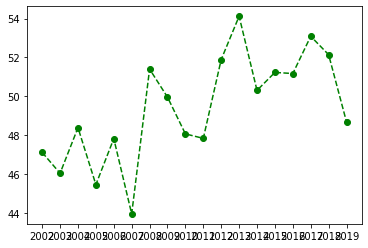

In [35]:
from matplotlib.pyplot import plot

taux_cheri = [float(ligne['women_expression_rate']) 
              for ligne in paroles 
              if ligne['channel_name'] == 'Chérie FM']

annee_cheri = [ligne['year'] 
               for ligne in paroles 
               if ligne['channel_name'] == 'Chérie FM']

plot(annee_cheri, taux_cheri, 'g--o') # g comme Green, -- comme tirets, o comme rond